## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns="EIN")
application_df = application_df.drop(columns="NAME")
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = application_df["APPLICATION_TYPE"].value_counts(ascending=False).index[8:].tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_count = pd.DataFrame(application_df["CLASSIFICATION"].value_counts())
class_count[class_count['CLASSIFICATION']>0]

,CLASSIFICATION
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C4120,1
C8210,1
C2561,1
C4500,1


In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = application_df["CLASSIFICATION"].value_counts(ascending=False).index[5:].tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Look at INCOME_AMT value counts for binning
application_df["INCOME_AMT"].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [10]:
# Look at INCOME_AMT value counts for binning
application_df["AFFILIATION"].value_counts()

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
affiliations_to_replace = application_df["AFFILIATION"].value_counts(ascending=False).index[2:].tolist()

# Replace in dataframe
for aff in affiliations_to_replace:
    application_df['AFFILIATION'] = application_df['AFFILIATION'].replace(aff,"Other")
    
# Check to make sure binning was successful
application_df['AFFILIATION'].value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)

In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   STATUS                        34299 non-null  int64
 1   ASK_AMT                       34299 non-null  int64
 2   IS_SUCCESSFUL                 34299 non-null  int64
 3   APPLICATION_TYPE_Other        34299 non-null  uint8
 4   APPLICATION_TYPE_T10          34299 non-null  uint8
 5   APPLICATION_TYPE_T19          34299 non-null  uint8
 6   APPLICATION_TYPE_T3           34299 non-null  uint8
 7   APPLICATION_TYPE_T4           34299 non-null  uint8
 8   APPLICATION_TYPE_T5           34299 non-null  uint8
 9   APPLICATION_TYPE_T6           34299 non-null  uint8
 10  APPLICATION_TYPE_T7           34299 non-null  uint8
 11  APPLICATION_TYPE_T8           34299 non-null  uint8
 12  AFFILIATION_CompanySponsored  34299 non-null  uint8
 13  AFFILIATION_Independent       3

## Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=40))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1230      
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,121
Trainable params: 3,121
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Add in callbacks
os.makedirs("checkpoints_v3/", exist_ok=True)
checkpoint_path = "checkpoints_v3/weights.{epoch:02d}.hdf5"

cp_callback = ModelCheckpoint(filepath=checkpoint_path, save_weights_only = True, period = 5)

In [18]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5762 - accuracy: 0.7165
Epoch 2/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5544 - accuracy: 0.7314
Epoch 3/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5514 - accuracy: 0.7309
Epoch 4/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5495 - accuracy: 0.7333
Epoch 5/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5484 - accuracy: 0.7342
Epoch 6/200
804/804 [==============================] - 3s 4ms/step - loss: 0.5474 - accuracy: 0.7355
Epoch 7/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5471 - accuracy: 0.7352
Epoch 8/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5458 - accuracy: 0.7348
Epoch 9/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5461 - accuracy: 0.7350
Epoch 10/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5444 - accura

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5683 - accuracy: 0.7257 - 438ms/epoch - 2ms/step
Loss: 0.5682671070098877, Accuracy: 0.7257142663002014


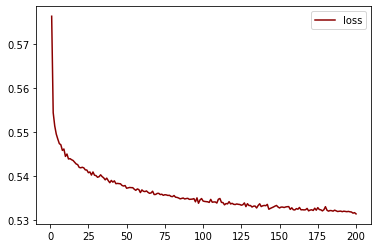

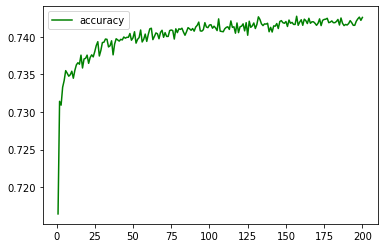

In [20]:
# Create a DataFrame containing training history
train_results_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
train_results_df.index += 1

# Plot the loss
V1_1_loss = train_results_df.plot(y="loss", color='darkred')
plt.savefig('Images/loss_v4.png')

V1_1_Acc = train_results_df.plot(y="accuracy", color='green')
plt.savefig('Images/acc_v4.png')


In [21]:
# Export our model to HDF5 file
nn_model.save('Output/AlphabetSoupCharity_Optimisation_V4.h5.')